In [35]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt

def round2int(x):
    """int is sensitive to floating point numerical errors near whole numbers,
    this moves the discontinuity to the half interval. It is also equivalent
    to the normal rules for rounding positive numbers."""
    # int(x + (x>0) -0.5) # round2int for positive and negative numbers
    return int(x+0.5)

barr = 5.0

M43171 =[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 3.96, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]
M43172=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 0.565, 'AlAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

M43226=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 0.424, 'AlAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

M43140=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

M43141=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 3.96, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

M43521=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 23.74,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

M43523=[
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ barr, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

listsamples =  ['M43171','M43172','M43226','M43140','M43141','M43521','M43523']
listsamples2 =  ['M0','M1','M2','M3','M4','M5','M6']

cs=0
names = [M43523,M43521,M43140,M43141,M43226,M43172,M43171]
sumwide = 0
splist=[]
yplist=[]
cpn=1
for sample in names:
    dx=0.01
    x_max = sum([layer[0] for layer in sample]) #total thickness (m)
    splist.append(round(x_max))
    n_max = int(x_max/dx)
    CB    = np.zeros(n_max)
    xaxis = np.arange(0,n_max)
    position=0.0
    structure=sample        
    sumwide+=sum([layer[0] for layer in sample[::2]])
    for layer in structure:
        #print(layer[0])
        
        startindex = round2int(position/dx)
        position   += layer[0] # update position to end of the layer
        finishindex = round2int(position/dx)
        matType     = layer[1] 
        if matType == 'GaAs':
            CB[startindex:finishindex] = 0
        elif matType == 'AlGaAs':
            CB[startindex:finishindex] = 7
        elif matType == 'AlAs':
            CB[startindex:finishindex] = 10
            
        yplist.append([round(max(CB+cs*13))])
    qw = np.vstack((xaxis[::5]/100,CB[::5]+cs*13)).T
    plt.plot(qw[:,0],qw[:,1])
    np.savetxt('%s.txt'%listsamples2[cs],qw,delimiter=',')
    ##print('%s.txt'%listsamples[cs])
    cs+=1

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [226]:
for sample in zip(M43171,M43172,M43226,M43140,M43141,M43521,M43523):
    dx=0.1
    x_max = sum([layer[0] for layer in sample]) #total thickness (m)
    n_max = int(x_max/dx)
    CB    =  np.zeros(n_max)
    xaxis = np.arange(0,n_max)
    position=0.0
    print(len(xaxis),len(CB))

490 490
830 830
148 148
1048 1048
490 490


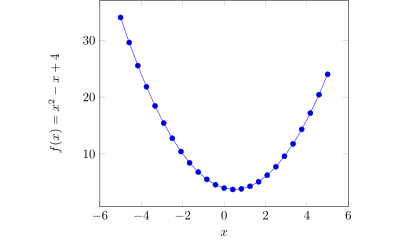

In [167]:
%%tikz -p pgfplots -f svg

\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}